<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/EDA_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Originalmente, en el dataset heart-disease from kaggle (https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data) estaban presentes los siguientes datos:


### **Descripción de variables**

- Age: La edad del individuo. +

- Gender: El género del individuo (Masculino o Femenino). +

- Blood Pressure: La presión arterial del individuo (sistólica). +

- Cholesterol Level: El nivel total de colesterol del individuo. +

- Exercise Habits: Los hábitos de ejercicio del individuo (Bajo, Medio, Alto). +

- Smoking: Si el individuo fuma o no (Sí o No). +

- Family Heart Disease: Si hay antecedentes familiares de enfermedad cardíaca (Sí o No). +

- Diabetes: Si el individuo tiene diabetes (Sí o No). +

- BMI: El índice de masa corporal del individuo. +

- High Blood Pressure: Si el individuo tiene presión arterial alta (Sí o No). +

- Low HDL Cholesterol: Si el individuo tiene colesterol HDL bajo (Sí o No). +

- High LDL Cholesterol: Si el individuo tiene colesterol LDL alto (Sí o No). +

- Alcohol Consumption: El nivel de consumo de alcohol del individuo (Ninguno, Bajo, Medio, Alto). +

- Stress Level: El nivel de estrés del individuo (Bajo, Medio, Alto).

- Sleep Hours: La cantidad de horas que duerme el individuo. +

- Sugar Consumption: El nivel de consumo de azúcar del individuo (Bajo, Medio, Alto). +

- Triglyceride Level: El nivel de triglicéridos del individuo. +

- Fasting Blood Sugar: El nivel de glucosa en sangre en ayunas del individuo. +

- CRP Level: El nivel de proteína C reactiva (un marcador de inflamación). +

- Homocysteine Level: El nivel de homocisteína del individuo (un aminoácido que afecta la salud de los vasos sanguíneos). (posiblemente presente en otros períodos de NHANES)

- Heart Disease Status: El estado de la enfermedad cardíaca del individuo (Sí o No).+

### **Nuevo dataset encontrado**

In [8]:
path = "/content/drive/MyDrive/NHANES"
import os
os.listdir(path)


['demographics.csv',
 'laboratory.csv',
 'dietary.csv',
 'examination.csv',
 'questionnaire.csv']

DATASET: https://www.kaggle.com/datasets/rileyzurrin/national-health-and-nutrition-exam-survey-2017-2018

Los datos se obtienen de la Encuesta Nacional de Examen de Salud y Nutrición (NHANES) en EEUU.

NHANES: https://wwwn.cdc.gov/nchs/nhanes/

Pequeña descripción:

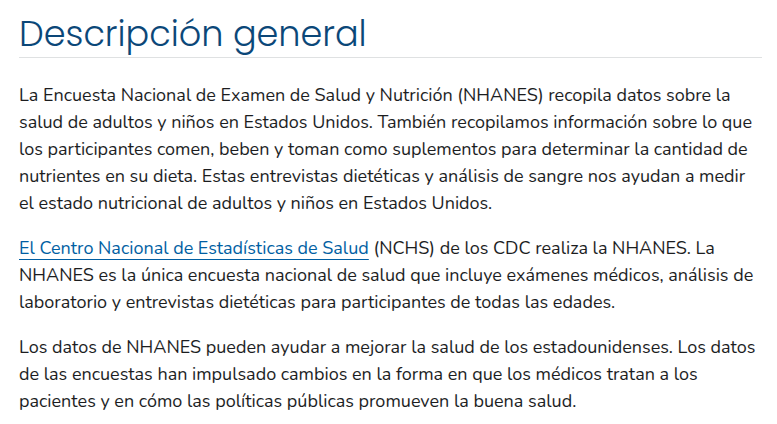



Los datos tomados para las siguientes pruebas son del período 2017-2018. Se podría analizar la posibilidad de tomar más períodos, siempre y cuando en esos periodos se hayan recolectado todos los datos necesarios para el proyecto. También en caso de que hubiera muchos faltantes en el período 2017-2018.

Los datos se cargan em archivos por separado. Son datos demográficos, de laboratorio, mediciones físicas, exámenes médicos y de alimentación de distintos pacientes indentificados con un ID llamado SEQN.

In [9]:
import pandas as pd

df_demo = pd.read_csv(f"{path}/demographics.csv")
df_lab  = pd.read_csv(f"{path}/laboratory.csv")
df_exam = pd.read_csv(f"{path}/examination.csv")
df_diet = pd.read_csv(f"{path}/dietary.csv")
df_quest= pd.read_csv(f"{path}/questionnaire.csv")


In [10]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, "SEQN" in df.columns)


demo True
lab True
exam True
diet True
quest True


In [11]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df.shape)


demo (9254, 46)
lab (8366, 386)
exam (8704, 490)
diet (9254, 362)
quest (9254, 956)


In [12]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df["SEQN"].nunique(), "personas únicas")


demo 9254 personas únicas
lab 8366 personas únicas
exam 8704 personas únicas
diet 9254 personas únicas
quest 9254 personas únicas


In [13]:
df = df_demo.merge(df_lab,  on="SEQN", how="left")
df = df.merge(df_exam, on="SEQN", how="left")
df = df.merge(df_diet, on="SEQN", how="left")
df = df.merge(df_quest,on="SEQN", how="left")

df.shape


(9254, 2236)

In [ ]:
df.head()

el dataset posee 2236 columnas

In [14]:
df["SEQN"].nunique()


9254

In [15]:
df.isnull().mean().sort_values(ascending=False).head(30)


,0
BMIHEAD,1.000000
OSQ040CE,0.999892
HIQ031AA,0.999892
OSD030CE,0.999892
OSD050CC,0.999892
OSD050CE,0.999892
MCQ230D,0.999892
OSQ100J,0.999892
OSD110J,0.999892
SMQ665B,0.999892


primera limpieza: se eliminan columnas con faltantes de mas del 80%

In [16]:
threshold = 0.80
missing_ratio = df.isnull().mean()

cols_to_drop = missing_ratio[missing_ratio > threshold].index
len(cols_to_drop)

801

In [17]:
df_clean = df.drop(columns=cols_to_drop)
df_clean.shape


(9254, 1435)

In [18]:
df_clean.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,WHQ040,WHD050,WHQ070,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ190
0,93703.0,10.0,2.0,2.0,2.0,5.0,6.0,2.0,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,10.0,2.0,1.0,2.0,3.0,3.0,1.0,33.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,10.0,2.0,2.0,66.0,4.0,4.0,2.0,NaN,2.0,...,3.0,165.0,2.0,4.0,150.0,130.0,63.0,170.0,62.0,2.0
3,93706.0,10.0,2.0,1.0,18.0,5.0,6.0,2.0,222.0,2.0,...,3.0,145.0,2.0,5.0,NaN,NaN,NaN,150.0,17.0,2.0
4,93707.0,10.0,2.0,1.0,13.0,5.0,7.0,2.0,158.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
"SEQN" in df_clean.columns


True

In [20]:
df_clean = df_clean[df_clean["RIDAGEYR"] >= 18]
df_clean.shape


(5856, 1435)

In [21]:
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

valores de esas columnas.

Significados:

1- si
2 - no
7 - no quizo contestar
9 - no sabe


In [22]:
for col in cvd_cols:
    print(f"Valores en {col}:")
    print(df_clean[col].value_counts(dropna=False))
    print("-"*30)

Valores en MCQ160B:
MCQ160B
2.0    5351
NaN     287
1.0     201
9.0      17
Name: count, dtype: int64
------------------------------
Valores en MCQ160C:
MCQ160C
2.0    5288
NaN     287
1.0     265
9.0      16
Name: count, dtype: int64
------------------------------
Valores en MCQ160D:
MCQ160D
2.0    5378
NaN     287
1.0     161
9.0      30
Name: count, dtype: int64
------------------------------
Valores en MCQ160E:
MCQ160E
2.0    5289
NaN     287
1.0     270
9.0      10
Name: count, dtype: int64
------------------------------


como se ve, algunos encuestados no saben si tienen algunas de esas patologias. Son muy pocos. por lo tanto, los elimino.Tambien se eliminan los que tienen faltantes, ya que al tratarse del target,se necesitan datos confiables.

In [23]:
import numpy as np

# Reemplazar 9 por NaN (no sabe)
df_clean[cvd_cols] = df_clean[cvd_cols].replace(9, np.nan)

# Eliminar filas donde no hay info en ninguna columna de CVD
df_clean = df_clean[df_clean[cvd_cols].notna().any(axis=1)]

# Crear target binario
df_clean["alto_riesgo"] = (df_clean[cvd_cols] == 1).any(axis=1).astype(int) ## si respondió si en alguna de las variables, se codifica como que si posee enfermedad cardiovascular

# Verificar distribución
print(df_clean["alto_riesgo"].value_counts())



alto_riesgo
0    5041
1     527
Name: count, dtype: int64


In [25]:
df_clean.shape

(5568, 1436)

In [37]:
variable = 'AQ640'

if variable in df_clean.columns:
    print("La variable existe")
    print(df_clean[variable].unique())
else:
    print("La variable NO existe")


La variable NO existe


Aún se tiene una buena cantidad de datos

In [26]:
df_clean.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,WHD050,WHQ070,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ190,alto_riesgo
2,93705.0,10.0,2.0,2.0,66.0,4.0,4.0,2.0,NaN,2.0,...,165.0,2.0,4.0,150.0,130.0,63.0,170.0,62.0,2.0,0
5,93708.0,10.0,2.0,2.0,66.0,5.0,6.0,2.0,NaN,2.0,...,118.0,2.0,5.0,118.0,100.0,60.0,120.0,40.0,2.0,0
6,93709.0,10.0,2.0,2.0,75.0,4.0,4.0,1.0,NaN,2.0,...,190.0,2.0,3.0,170.0,160.0,62.0,200.0,50.0,2.0,0
8,93711.0,10.0,2.0,1.0,56.0,5.0,6.0,2.0,NaN,2.0,...,142.0,2.0,5.0,142.0,148.0,69.0,152.0,33.0,2.0,0
10,93713.0,10.0,2.0,1.0,67.0,3.0,3.0,1.0,NaN,1.0,...,168.0,2.0,5.0,190.0,170.0,72.0,195.0,45.0,2.0,0


In [27]:
df_clean["alto_riesgo"].value_counts(normalize=True)


,proportion
alto_riesgo,
0,0.905352
1,0.094648


In [45]:
import pandas as pd

# Diccionario con todas las variables y su significado
nhanes_vars_dict = {
    "SEQN": "Identificador único del participante",
    "RIDAGEYR": "Edad del participante (años)", # numerica
    "RIAGENDR": "Género (1=Hombre, 2=Mujer)", # binaria
    "BPXSY1": "Presión sistólica, medición 1 (mmHg)", # numerica continua
    "BPXSY2": "Presión sistólica, medición 2 (mmHg)", # numerica continua
    "BPXSY3": "Presión sistólica, medición 3 (mmHg)", # numerica continua
    # "BPXSY4": "Presión sistólica, medición 4 (mmHg)",   YA NO EXISTE EN ESTE PUNTO
    "LBXTC": "Colesterol total (mg/dL)",
    "LBDHDD": "Colesterol HDL (mg/dL)",
    "LBDLDL": "Colesterol LDL (mg/dL)",
    "LBXTR": "Triglicéridos (mg/dL)",
    "LBXGLU": "Glucosa en ayunas (mg/dL)",
    "LBXHSCRP": "Proteína C reactiva de alta sensibilidad (hs-CRP) (mg/dL, marcador de inflamación)",
    ## ------ Para target -----------
    "MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?",
    "MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?",
    "MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?",
    "MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?",
    ## ------------------------------
    "MCQ300A": "Pariente con enfermedad cardíaca (si ha tenido nu ataque cardíaco o angina)",
    "MCQ300B": "Pariente con asma",
    "MCQ300C": "Pariente con diabetes",
    "DIQ010": "Diabetes declarada por médico",
    "BPQ020": "Diagnóstico de presión arterial alta",
    "BMXBMI": "Índice de masa corporal (kg/m²)",
    "SMQ020": "Fumador en algún momento de la vida",
    "SMQ040": "Fuma actualmente",
    "PAQ605": "Actividad física: caminar/bici últimos 7 días",
    "PAQ620": "Actividad física moderada últimos 7 días",
    "PAQ635": "Actividad física vigorosa últimos 7 días",
    "PAQ650": "Tiempo sentado promedio diario",
    "SLD012": "Horas de sueño promedio por noche",
    "DPQ010": "Pregunta 1 escala depresión",
    "DPQ020": "Pregunta 2 escala depresión",
    "DPQ030": "Pregunta 3 escala depresión",
    "DPQ040": "Pregunta 4 escala depresión",
    "DPQ050": "Pregunta 5 escala depresión",
    "DPQ060": "Pregunta 6 escala depresión",
    "DPQ070": "Pregunta 7 escala depresión",
    "DPQ080": "Pregunta 8 escala depresión",
    "DPQ090": "Pregunta 9 escala depresión",
    # "ALD020": "A lo largo de tu vida, ¿cuántos días has consumido al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    # "ALD030": "Durante los últimos 30 días, ¿cuántos días consumiste al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    "ALQ130": "Durante los últimos 12 meses, en los días que {usted/SP} consumió bebidas alcohólicas, ¿cuántas copas tomó en promedio? Por copa, se refiere a una cerveza de 355 ml, una copa de vino de 145 ml o una onza y media de licor.",
    "DR1TSUGR": "Consumo de azúcar total del día (gramos)",
    # agregados despues
    "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "Recodificación de información reportada sobre raza y origen hispano, con categoría de asiático no hispano",
    "BPXDI1" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI2" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI3" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXPULS": "Pulso ¿regular o irregular? (1 -regular, 2- irregular)", # numerica binaria
    "LBXGH" :	"Glicohemoglobina (%)", # numerica
    "LBXHGB":  "Hemoglobina (g/dL)",
    "LBXRDW": "Ancho de distribución de glóbulos rojos (%)",
    "LBXSCR": "Creatinina, suero refrigerado (mg/dL)",
    # "PAQ610": "(Días por semana de actividad intensa en el trabajo)", faltantes
    # AQ625 (días de actividad moderada en el trabajo)
    # AQ640 (días caminando/bicicleta para transporte)
    # PAQ655 (días actividad deportiva vigorosa)
    "PAQ665": "(actividad deportiva moderada, sí/no)",
    "PAQ670": "(días actividad deportiva moderada)",
    "DIQ160": "(prediabetes / glucosa alterada)",
    "MCQ160F": "(alguna vez ACV)",
    "BPQ080": "Diagnóstico de colesterol alto",
    # "BPQ100D":"cumplimiento de medicación para colesterol",
    "BPQ090D": "Told to take prescriptn for cholesterol",
    "KIQ022" : "¿Alguna vez le dijeron que tiene riñones débiles o fallando?",
    "ALQ121": "Durante los últimos 12 meses, ¿con qué frecuencia consumiste cualquier tipo de bebida alcohólica? Indica cuántos días por semana, por mes o por año.",
    "ALQ142": "Durante los últimos 12 meses, ¿con qué frecuencia tomaste {DISPLAY NUMBER} o más bebidas alcohólicas en un solo día? Indica cuántos días por semana, por mes o por año.",
    "ALQ170": "Considerando todos los tipos de bebidas alcohólicas, durante los últimos 30 días, ¿cuántas veces tomaste {4/5} o más bebidas en una ocasión?"


# ALD030 – Durante los últimos 30 días, ¿en cuántos días consumiste al menos una bebida alcohólica?


# ALD040 – Durante los últimos 30 días, ¿en cuántos días consumiste {'4' mujeres, '5' hombres - mostrar número} o más bebidas alcohólicas seguidas, es decir, en un par de horas?

}
#" opcionales
# LBXIN -	Insulina (uU/mL)
# LBXFER - Ferritina (ng/mL)
# "URXCOTT" : "Cotinina (ng/mL)" #si, no hay respuesta clara de tabaquismo
# CDQ001 (Dolor/molestia en el pecho alguna vez) → Opcional / complementaria
# CDQ002 (Dolor al subir cuestas o apurarse) → Opcional / complementaria
# CDQ003 (Dolor al caminar a paso normal) → Opcional / complementaria
# CDQ008 (Dolor intenso >30 min en pecho) → Opcional / relevante si querés preinfarto


In [58]:
variable = 'ALD040'

if variable in df_clean.columns:
    print("La variable existe")
    print(df_clean[variable].unique())
else:
    print("La variable NO existe")

La variable NO existe


In [ ]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E", "SEQN"]

# Lista de variables que proponés
selected_vars = list(nhanes_vars_dict.keys())

# Ver cuáles existen realmente en df_clean
existing_vars = [var for var in selected_vars if var in df_clean.columns]


# Features = todas las columnas existentes menos las de CVD y el target ya creado
feature_cols = [col for col in existing_vars if col not in cvd_cols and col != "alto_riesgo"]

print(f"Número de features que vamos a usar: {len(feature_cols)}")
print(feature_cols)


In [ ]:
# Variables que se eliminaron
removed_vars = [var for var in selected_vars if var not in existing_vars]

print(f"Se eliminaron {len(removed_vars)} variables:")
print(removed_vars)


In [4]:
print(df_clean.columns.tolist())


NameError: name 'df_clean' is not defined

In [5]:
df_clean = df_clean.drop(columns=["SEQN"])


NameError: name 'df_clean' is not defined

In [ ]:
print(df_clean.columns.tolist())

In [ ]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

# Crear un DataFrame mínimo que tenga solo las features y el target
df_min = df_clean[feature_cols + ["alto_riesgo"]]

# Verificar
print(df_min.shape)
print(df_min.columns)


In [ ]:
# Crear diccionario con los nombres cortos que corresponden solo a tus features
short_names_dict = {
    "RIDAGEYR": "edad",
    "RIAGENDR": "genero",
    "BPXSY1": "presion1",
    "BPXSY2": "presion2",
    "BPXSY3": "presion3",
    "LBXTC": "colesterol_total",
    "LBDHDD": "hdl",
    "LBDLDL": "ldl",
    "LBXTR": "trigliceridos",
    "LBXGLU": "glucosa",
    "LBXHSCRP": "hs_crp",
    "MCQ300A": "fam_cardio",
    "MCQ300B": "fam_asma",
    "MCQ300C": "fam_diabetes",
    "DIQ010": "diabetes",
    "BPQ020": "hipertension",
    "BMXBMI": "bmi",
    "SMQ020": "fumador_hist",
    "SMQ040": "fumador_actual",
    "PAQ605": "act_caminar_bici",
    "PAQ620": "act_moderada",
    "PAQ635": "act_vigorosa",
    "PAQ650": "tiempo_sentado",
    "SLD012": "horas_suenio",
    "DPQ010": "depresion_1",
    "DPQ020": "depresion_2",
    "DPQ030": "depresion_3",
    "DPQ040": "depresion_4",
    "DPQ050": "depresion_5",
    "DPQ060": "depresion_6",
    "DPQ070": "depresion_7",
    "DPQ080": "depresion_8",
    "DPQ090": "depresion_9",
    "ALQ130": "alcohol_promedio",
    "DR1TSUGR": "azucar_total"
}


# Filtrar short_names_dict para quedarnos solo con columnas que existen en df_min
# short_names_dict_filtered = {k: v for k, v in short_names_dict.items() if k in df_min.columns}

# Renombrar columnas en df_min
df_min = df_min.rename(columns=short_names_dict)

# Actualizar lista de features con los nombres cortos
feature_cols = [short_names_dict[col] for col in feature_cols if col in short_names_dict]

# Verificar
print("Nuevos nombres de features:")
print(feature_cols)
print("Columnas del DataFrame mínimo renombrado:")
print(df_min.columns)



In [6]:
print(df_min.columns)



NameError: name 'df_min' is not defined

#### --------------------------------------------------------------------------------

Prueba rápida de algunos datos que tiene el dataset. Las variables se encuentran codificadas y su descripción está disponible en la página oficial de la encuesta.

Se tomaron algunos datos necesarios para el proyecto pero se podria estudiar la posibilidad de usar más datos disponibles, ya que hay muchos.


In [ ]:
cols = [
    # Identificador
    "SEQN",

    # Age, Gender
    "RIDAGEYR",   # Age
    "RIAGENDR",   # Gender

    # Blood Pressure (systolic – todas las mediciones)
    "BPXSY1", "BPXSY2", "BPXSY3", "BPXSY4",

    # Cholesterol
    "LBXTC",      # Total cholesterol

    # Exercise
    "PAQ605", "PAQ620", "PAQ635", "PAQ650",

    # Smoking
    "SMQ020", "SMQ040",

    # Family Heart Disease
    "MCQ300A", "MCQ300B",

    # Diabetes
    "DIQ010",

    # BMI
    "BMXBMI",

    # High Blood Pressure (diagnosis)
    "BPQ020",

    # HDL / LDL
    "LBDHDD", "LBDLDL",

    # Alcohol
    "ALQ101", "ALQ120Q", "ALQ130",

    # Stress (proxies, sin transformar)
    "DPQ010", "DPQ020", "DPQ030", "DPQ040", "DPQ050",
    "DPQ060", "DPQ070", "DPQ080", "DPQ090",

    # Sleep
    "SLD012",

    # Sugar consumption
    "DR1TSUGR",

    # Triglycerides
    "LBXTR",

    # Fasting glucose
    "LBXGLU",

    # CRP
    "LBXCRP",

    # Heart disease status
    "MCQ160B", "MCQ160C", "MCQ160D"
]


In [ ]:
existing_cols = [c for c in cols if c in df.columns]
missing_cols  = [c for c in cols if c not in df.columns]

print("Columnas presentes:", len(existing_cols))
print("Columnas NO encontradas:", missing_cols)


In [ ]:
df_subset = df[existing_cols].copy()

df_subset.shape


In [ ]:
df_subset.head()


In [ ]:
df_subset.isnull().mean().sort_values(ascending=False)


Se muestran el listado y descripción de algunos de los datos presentes.

In [7]:
import pandas as pd

# Diccionario con todas las variables y su significado
nhanes_vars_dict = {
    "SEQN": "Identificador único del participante",
    "RIDAGEYR": "Edad del participante (años)",
    "RIAGENDR": "Género (1=Hombre, 2=Mujer)",
    "BPXSY1": "Presión sistólica, medición 1 (mmHg)",
    "BPXSY2": "Presión sistólica, medición 2 (mmHg)",
    "BPXSY3": "Presión sistólica, medición 3 (mmHg)",
    "BPXSY4": "Presión sistólica, medición 4 (mmHg)",
    "LBXTC": "Colesterol total (mg/dL)",
    "LBDHDD": "Colesterol HDL (mg/dL)",
    "LBDLDL": "Colesterol LDL (mg/dL)",
    "LBXTR": "Triglicéridos (mg/dL)",
    "LBXGLU": "Glucosa en ayunas (mg/dL)",
    "LBXHSCRP": "Proteína C reactiva de alta sensibilidad (hs-CRP) (mg/dL, marcador de inflamación)",
    ## ------ Para target -----------
    "MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?",
    "MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?",
    "MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?",
    "MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?",
    ## ------------------------------
    "MCQ300A": "Pariente con enfermedad cardíaca (si ha tenido nu ataque cardíaco o angina)",
    "MCQ300B": "Pariente con asma",
    "MCQ300C": "Pariente con diabetes",
    "DIQ010": "Diabetes declarada por médico",
    "BPQ020": "Diagnóstico de presión arterial alta",
    "BMXBMI": "Índice de masa corporal (kg/m²)",
    "SMQ020": "Fumador en algún momento de la vida",
    "SMQ040": "Fuma actualmente",
    "PAQ605": "Actividad física: caminar/bici últimos 7 días",
    "PAQ620": "Actividad física moderada últimos 7 días",
    "PAQ635": "Actividad física vigorosa últimos 7 días",
    "PAQ650": "Tiempo sentado promedio diario",
    "SLD012": "Horas de sueño promedio por noche",
    "DPQ010": "Pregunta 1 escala depresión",
    "DPQ020": "Pregunta 2 escala depresión",
    "DPQ030": "Pregunta 3 escala depresión",
    "DPQ040": "Pregunta 4 escala depresión",
    "DPQ050": "Pregunta 5 escala depresión",
    "DPQ060": "Pregunta 6 escala depresión",
    "DPQ070": "Pregunta 7 escala depresión",
    "DPQ080": "Pregunta 8 escala depresión",
    "DPQ090": "Pregunta 9 escala depresión",
    "ALD020": "A lo largo de tu vida, ¿cuántos días has consumido al menos una bebida alcohólica?",
    "ALD030": "Durante los últimos 30 días, ¿cuántos días consumiste al menos una bebida alcohólica?",
    "ALQ130": "Durante los últimos 12 meses, en los días que {usted/SP} consumió bebidas alcohólicas, ¿cuántas copas tomó en promedio? Por copa, se refiere a una cerveza de 355 ml, una copa de vino de 145 ml o una onza y media de licor.",
    "DR1TSUGR": "Consumo de azúcar total del día (gramos)"
}

# Filtrar solo las columnas que existen en df_subset
existing_vars = [col for col in nhanes_vars_dict.keys() if col in df_subset.columns]

# Crear DataFrame con % de faltantes
df_missing = pd.DataFrame({
    "Código NHANES": existing_vars,
    "Significado": [nhanes_vars_dict[col] for col in existing_vars],
    "% Faltantes": [df_subset[col].isnull().mean()*100 for col in existing_vars]
})

# Ordenar por % de faltantes y mostrar
df_missing = df_missing.sort_values("% Faltantes", ascending=False)
df_missing



NameError: name 'df_subset' is not defined

Se puede examinar otros períodos para ver si hay menos datos faltantes para aquellos que tienen un alto porcentaje de faltantes.

In [ ]:
import pandas as pd

# Asegurarse que SMQ040 esté en el dataframe reducido
if "SMQ040" in df.columns:
    if "SMQ040" not in df_subset.columns:
        df_subset["SMQ040"] = df["SMQ040"]

# Lista de variables actuales en df_subset
existing_vars = list(df_subset.columns)

# Crear DataFrame con % de faltantes
df_missing = pd.DataFrame({
    "Código NHANES": existing_vars,
    "Significado": [nhanes_vars_dict.get(col, "Variable sin descripción") for col in existing_vars],
    "% Faltantes": [df_subset[col].isnull().mean()*100 for col in existing_vars]
})

# Ordenar por % de faltantes
df_missing = df_missing.sort_values("% Faltantes", ascending=False)

# Mostrar
df_missing


SIGNIFICADO DE ALGUNAS DE LAS VARIABLES QUE PUEDEN USARSE PARA TARGET:

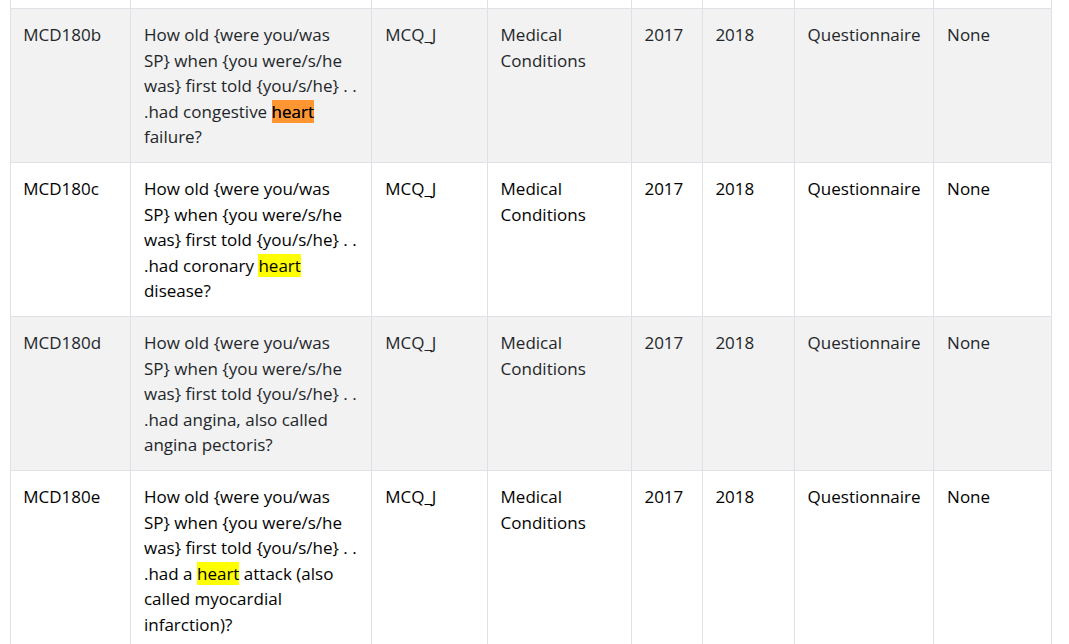



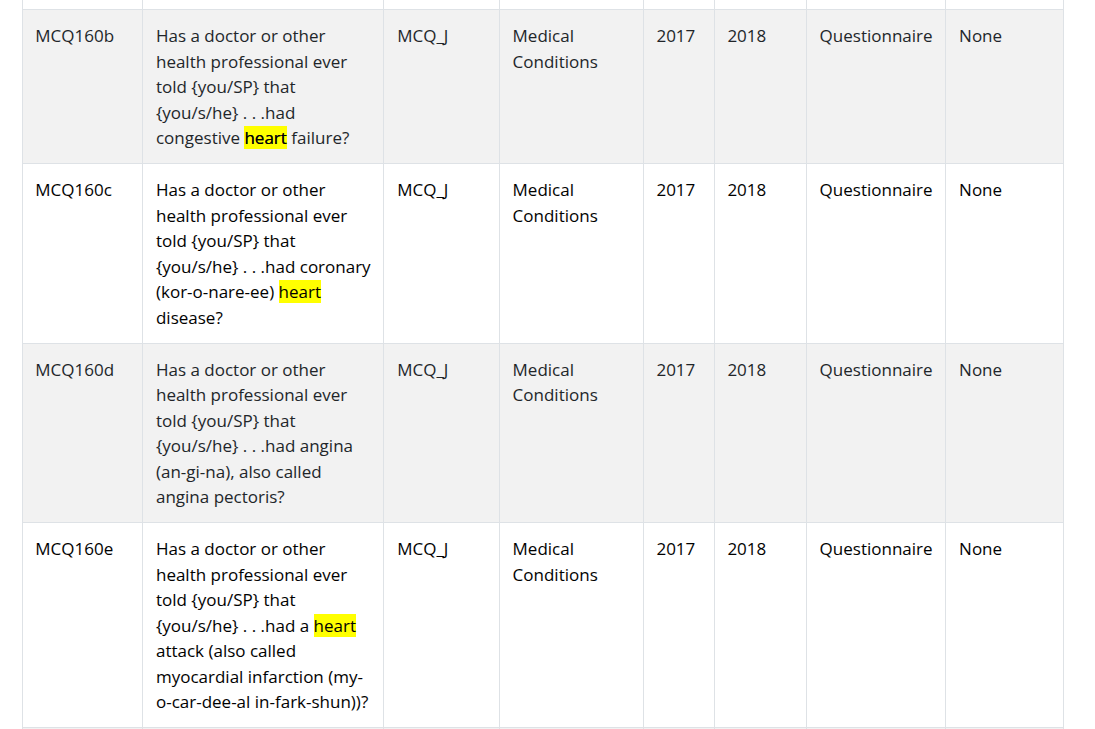

Prueba de los datos que se usarán para target

In [ ]:
# Lista de variables de enfermedades cardíacas
cardio_vars = ['MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E']

# Revisar si existen en df_subset
for var in cardio_vars:
    if var in df_subset.columns:
        print(f"\nConteo de respuestas para {var}:")
        print(df_subset[var].value_counts(dropna=False))  # incluye valores faltantes
    else:
        print(f"{var} no está en df_subset")



Significado de los valores:

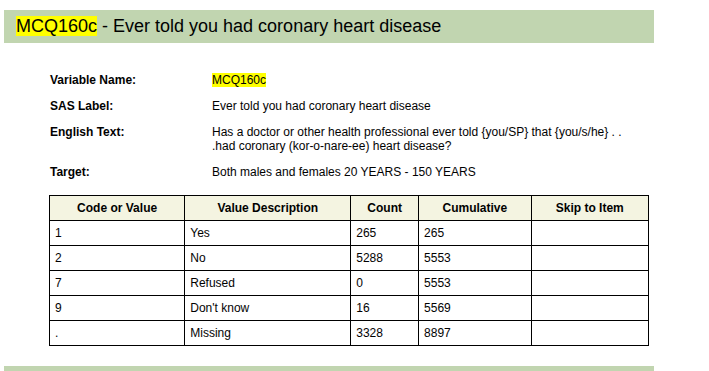